### 학습목표
1. 아이템별 지표 확인하기
2. 시간별 지역별 판매 지표 확인하기

In [1]:
import numpy as np
import pandas as pd
# seaborn
import seaborn as sns
COLORS = sns.color_palette()

%matplotlib inline 
# 그래프를 노트북 안에 그리기 위해 설정

In [2]:
# matplotlib 한글 폰트 출력코드
import matplotlib.pyplot as plt
import matplotlib
matplotlib.font_manager._rebuild()

from matplotlib import style
from matplotlib import font_manager , rc
import platform
platform.platform() #'Windows-10-10.0.19041-SP0' / 시스템 운영체제 확인 가능

try :
    if platform.sys() == 'windows':
        # 윈도우인 경우
        font_name = fontmanager.FontProperties(fname="c:/windows/Fonts/나눔고딕.ttf").get_name()
        rc('font', family=font_name)
    else:
        #max 인 경우
        rc('font', family='AppleGothic')
except:
    pass
matplotlib.rcParams['axes.unicode_minus'] = False
# rcParams 폰트 크기를 지정하기 
# 그래프에서 마이너스 기호가 표시되도록 하는 설정입니다. 


Matplotlib is building the font cache; this may take a moment.


In [3]:
plt.rcParams["font.family"] = 'serif'
print (plt.rcParams['font.family'] ) #현재 설정 된 폰트 ['sans-serif']이다 


['serif']


In [4]:
!conda install fonts-nanum*


CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/main/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

If your current network has https://www.anaconda.com blocked, please file
a support request with your network engineering team.

'https://repo.anaconda.com/pkgs/main/win-64'




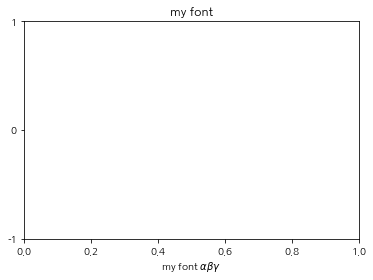

In [5]:
#I was able to get rid of the RuntimeWarning by declaring the font usage with:
#plt.rcParams["font.serif"] = "nanumGothic"
# 참조 -https://github.com/matplotlib/matplotlib/issues/17007
import matplotlib.pyplot as plt
plt.rcParams["font.serif"]= "nanumGothic"
fig, ax = plt.subplots()

ax.set_title('my font')
ax.set_xlabel(r'my font $\alpha\beta\gamma$')
ax.set_yticks([-1,0,1])
plt.show()

#### 데이터 로딩
1. 정제된 데이터 사용(OnlineRetailCleanhangle.csv)

In [6]:
dtypes = {
    '상품 가격': np.float32,
    '고객 아이디': np.int32,
    '주문 수량': np.int32
}
# 한글 깨짐 해결 방안
#[거의 해결] 해결책 (3) - Excel에서 인코딩 옵션 변경
# 파일을 우선 Excel에서 열어줍니다.
# 파일 - 다른 이름으로 저장에서 - CSV UTF-8 (쉼표로 분리) 로 변경하여 저장합니다.

retail = pd.read_csv('./OnlineRetailCleanhangle.csv', 
                     dtype=dtypes , 
                     encoding = 'utf-8')
retail.head()

,Unnamed: 0,주문 번호,아이템 아이디,상품 설명,주문 수량,주문 시각,상품 가격,고객 아이디,고객 거주 지역,총 주문 가격
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


#### 날짜 타입 데이터 변환
 - 문자열로 로딩하는 것보다 date/datetime 타입으로 로딩하는 것이 분석에 용이

In [7]:
retail['주문 시각'] = pd.to_datetime(retail['주문 시각'], infer_datetime_format=True)# infer_datetime_format=True 날짜시간 포맷 추정해서 파싱하기
retail.info() #5  주문 시각       397884 non-null  datetime64[ns]  바꿔짐

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  397884 non-null  int64         
 1   주문 번호       397884 non-null  int64         
 2   아이템 아이디     397884 non-null  object        
 3   상품 설명       397884 non-null  object        
 4   주문 수량       397884 non-null  int32         
 5   주문 시각       397884 non-null  datetime64[ns]
 6   상품 가격       397884 non-null  float32       
 7   고객 아이디      397884 non-null  int32         
 8   고객 거주 지역    397884 non-null  object        
 9   총 주문 가격     397884 non-null  float64       
dtypes: datetime64[ns](1), float32(1), float64(1), int32(2), int64(2), object(3)
memory usage: 25.8+ MB


#### 해당 기간 동안의 매출
 - 전체 매출
 - 국가별 매출
 - 월별 매출
 - 요일별 매출
 - 시간별 매출

#### 전체 매출

In [8]:
total_revenue = retail['총 주문 가격'].sum()
total_revenue

8911407.904

#### 국가별 매출

In [9]:
rev_by_countries = retail.groupby('고객 거주 지역').sum()['총 주문 가격'].sort_values(ascending=False) # 내림차순 : ascending=False
rev_by_countries

고객 거주 지역
United Kingdom          7.308392e+06
Netherlands             2.854463e+05
EIRE                    2.655459e+05
Germany                 2.288671e+05
France                  2.090240e+05
Australia               1.385213e+05
Spain                   6.157711e+04
Switzerland             5.644395e+04
Belgium                 4.119634e+04
Sweden                  3.837833e+04
Japan                   3.741637e+04
Norway                  3.616544e+04
Portugal                3.343989e+04
Finland                 2.254608e+04
Singapore               2.127929e+04
Channel Islands         2.045044e+04
Denmark                 1.895534e+04
Italy                   1.748324e+04
Cyprus                  1.359038e+04
Austria                 1.019868e+04
Poland                  7.334650e+03
Israel                  7.221690e+03
Greece                  4.760520e+03
Iceland                 4.310000e+03
Canada                  3.666380e+03
USA                     3.580390e+03
Malta                   2.725

[Text(0, 0, 'United Kingdom'),
 Text(1, 0, 'Netherlands'),
 Text(2, 0, 'EIRE'),
 Text(3, 0, 'Germany'),
 Text(4, 0, 'France'),
 Text(5, 0, 'Australia'),
 Text(6, 0, 'Spain'),
 Text(7, 0, 'Switzerland'),
 Text(8, 0, 'Belgium'),
 Text(9, 0, 'Sweden'),
 Text(10, 0, 'Japan'),
 Text(11, 0, 'Norway'),
 Text(12, 0, 'Portugal'),
 Text(13, 0, 'Finland'),
 Text(14, 0, 'Singapore'),
 Text(15, 0, 'Channel Islands'),
 Text(16, 0, 'Denmark'),
 Text(17, 0, 'Italy'),
 Text(18, 0, 'Cyprus'),
 Text(19, 0, 'Austria'),
 Text(20, 0, 'Poland'),
 Text(21, 0, 'Israel'),
 Text(22, 0, 'Greece'),
 Text(23, 0, 'Iceland'),
 Text(24, 0, 'Canada'),
 Text(25, 0, 'USA'),
 Text(26, 0, 'Malta'),
 Text(27, 0, 'Unspecified'),
 Text(28, 0, 'United Arab Emirates'),
 Text(29, 0, 'Lebanon'),
 Text(30, 0, 'Lithuania'),
 Text(31, 0, 'European Community'),
 Text(32, 0, 'Brazil'),
 Text(33, 0, 'RSA'),
 Text(34, 0, 'Czech Republic'),
 Text(35, 0, 'Bahrain'),
 Text(36, 0, 'Saudi Arabia')]

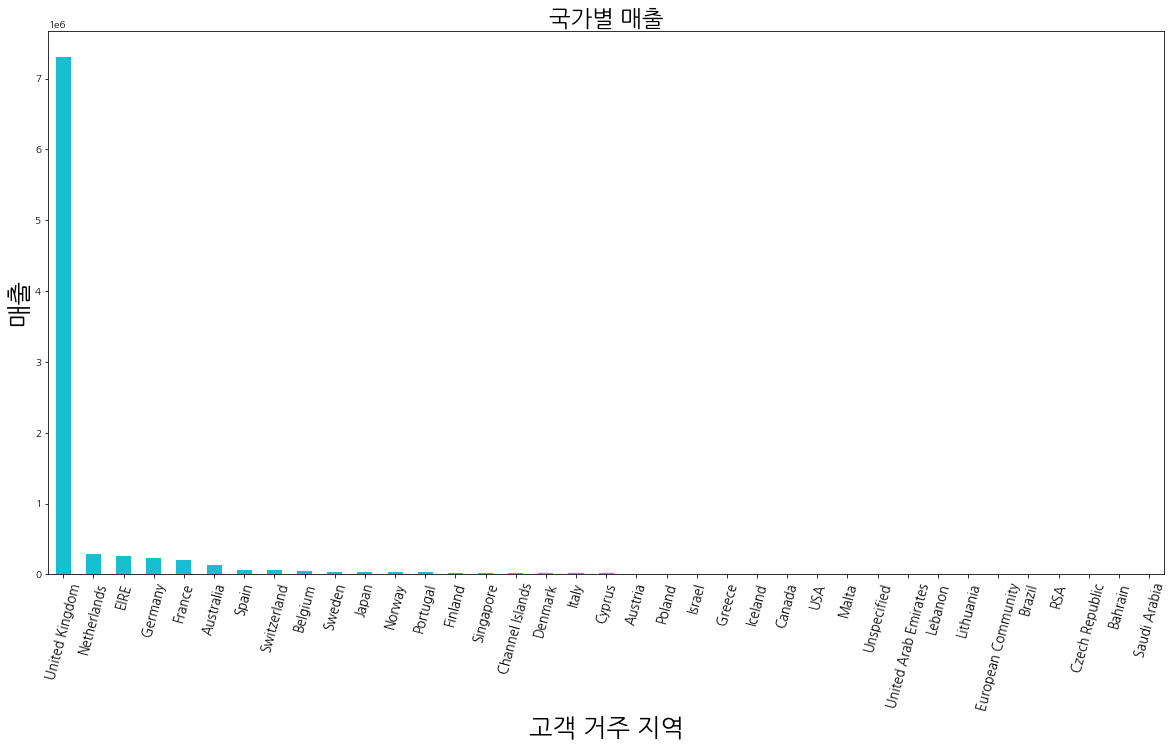

In [10]:
plot = rev_by_countries.plot(kind='bar', color=COLORS[-1], figsize=(20, 10))
plot.set_xlabel('고객 거주 지역', fontsize=25)
plot.set_ylabel('매출', fontsize=25)
plot.set_title('국가별 매출', fontsize=23)
plot.set_xticklabels(labels=rev_by_countries.index, rotation=75, fontsize=13)

In [11]:
rev_by_countries / total_revenue #비율 확인할 수 있다.

고객 거주 지역
United Kingdom          0.820116
Netherlands             0.032032
EIRE                    0.029798
Germany                 0.025682
France                  0.023456
Australia               0.015544
Spain                   0.006910
Switzerland             0.006334
Belgium                 0.004623
Sweden                  0.004307
Japan                   0.004199
Norway                  0.004058
Portugal                0.003752
Finland                 0.002530
Singapore               0.002388
Channel Islands         0.002295
Denmark                 0.002127
Italy                   0.001962
Cyprus                  0.001525
Austria                 0.001144
Poland                  0.000823
Israel                  0.000810
Greece                  0.000534
Iceland                 0.000484
Canada                  0.000411
USA                     0.000402
Malta                   0.000306
Unspecified             0.000299
United Arab Emirates    0.000213
Lebanon                 0.000190
L

#### 그래프 유틸 함수

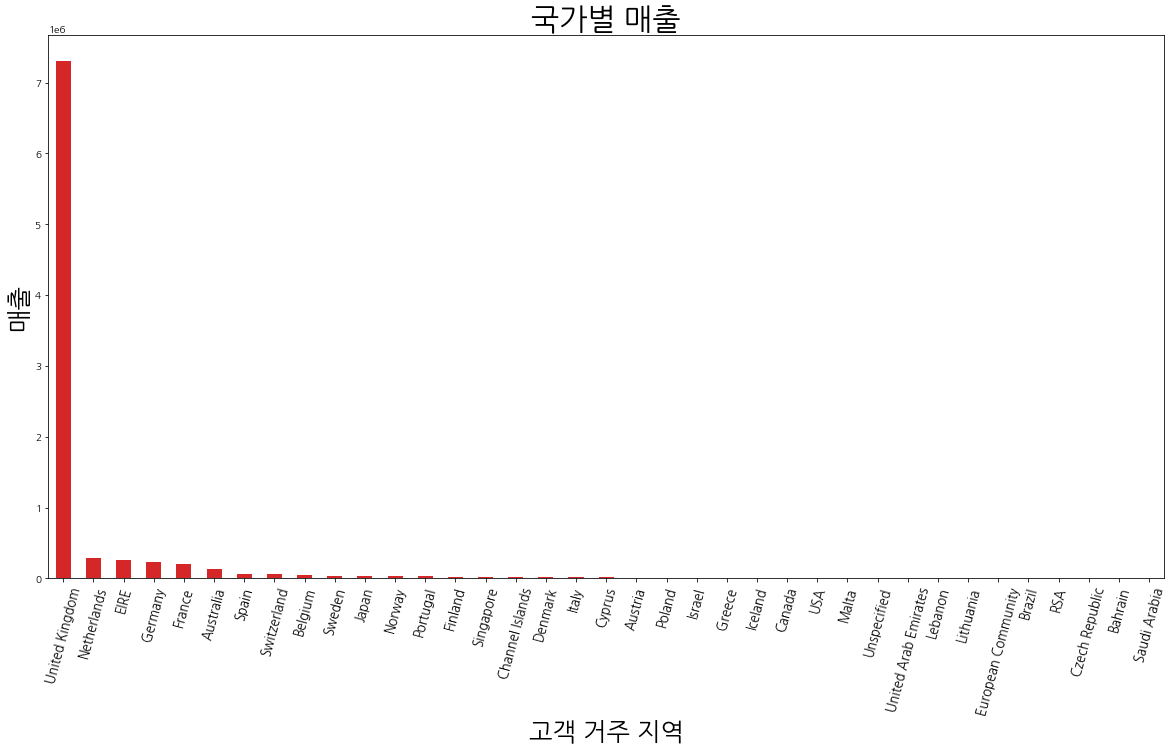

In [12]:
def plot_bar(df, xlabel, ylabel, title, color=COLORS[-7], figsize=(20, 10), rotation=45):
    plot = df.plot(kind='bar', color=color, figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=25)
    plot.set_ylabel(ylabel, fontsize=25)
    plot.set_title(title, fontsize=30)
    plot.set_xticklabels(labels=df.index, rotation=75 , fontsize=13)
                   
plot_bar(rev_by_countries, '고객 거주 지역', '매출', '국가별 매출')

In [13]:
grouped = retail.groupby('고객 거주 지역')
grouped.first()

,Unnamed: 0,주문 번호,아이템 아이디,상품 설명,주문 수량,주문 시각,상품 가격,고객 아이디,총 주문 가격
고객 거주 지역,,,,,,,,,
Australia,197,536389,22941,CHRISTMAS LIGHTS 10 REINDEER,6,2010-12-01 10:03:00,8.50,12431,51.00
Austria,34293,539330,37449,CERAMIC CAKE STAND + HANGING CAKES,8,2010-12-17 09:38:00,8.50,12370,68.00
Bahrain,181140,552449,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,24,2011-05-09 13:49:00,1.25,12355,30.00
Belgium,7279,537026,84375,SET OF 20 KIDS COOKIE CUTTERS,12,2010-12-03 16:35:00,2.10,12395,25.20
Brazil,157299,550201,22423,REGENCY CAKESTAND 3 TIER,16,2011-04-15 10:25:00,10.95,12769,175.20
Canada,119191,546533,20886,BOX OF 9 PEBBLE CANDLES,12,2011-03-14 13:53:00,1.95,15388,23.40
Channel Islands,20000,538002,22690,DOORMAT HOME SWEET HOME BLUE,2,2010-12-09 11:48:00,7.95,14932,15.90
Cyprus,29732,538826,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-14 12:58:00,2.55,12370,163.20
Czech Republic,103598,545072,22930,BAKING MOULD HEART MILK CHOCOLATE,18,2011-02-28 08:43:00,2.55,12781,45.90


In [14]:
grouped_sr = grouped.size()
grouped_sr

고객 거주 지역
Australia                 1182
Austria                    398
Bahrain                     17
Belgium                   2031
Brazil                      32
Canada                     151
Channel Islands            748
Cyprus                     614
Czech Republic              25
Denmark                    380
EIRE                      7236
European Community          60
Finland                    685
France                    8341
Germany                   9040
Greece                     145
Iceland                    182
Israel                     248
Italy                      758
Japan                      321
Lebanon                     45
Lithuania                   35
Malta                      112
Netherlands               2359
Norway                    1071
Poland                     330
Portugal                  1462
RSA                         57
Saudi Arabia                 9
Singapore                  222
Spain                     2484
Sweden                     451

In [15]:
grouped_sr.index 

Index(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
       'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE',
       'European Community', 'Finland', 'France', 'Germany', 'Greece',
       'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania', 'Malta',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA', 'Saudi Arabia',
       'Singapore', 'Spain', 'Sweden', 'Switzerland', 'USA',
       'United Arab Emirates', 'United Kingdom', 'Unspecified'],
      dtype='object', name='고객 거주 지역')

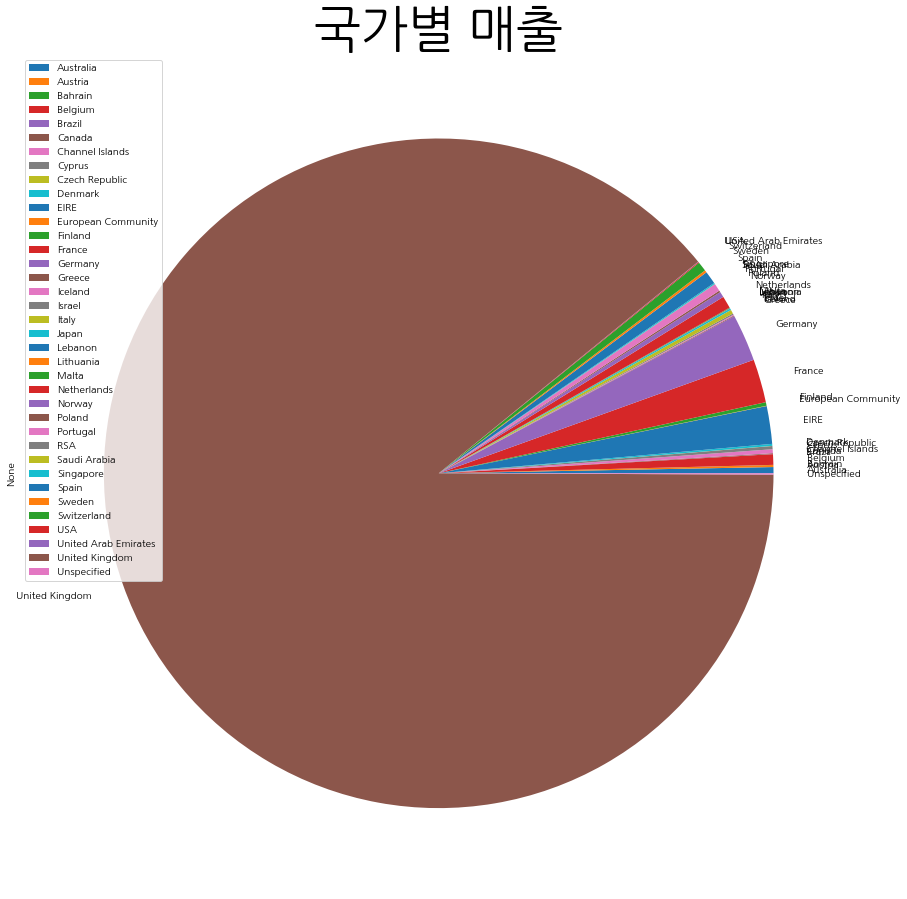

In [25]:
grouped_sr.plot(kind='pie', 
                figsize=(15,25),
               textprops={'size':10}
               )

plt.title('국가별 매출', size=50)

plt.legend(grouped_sr.index, loc='best')
plt.show()

- grouped_sr.index 가 많다보니 글씨가 잘 안보인다.

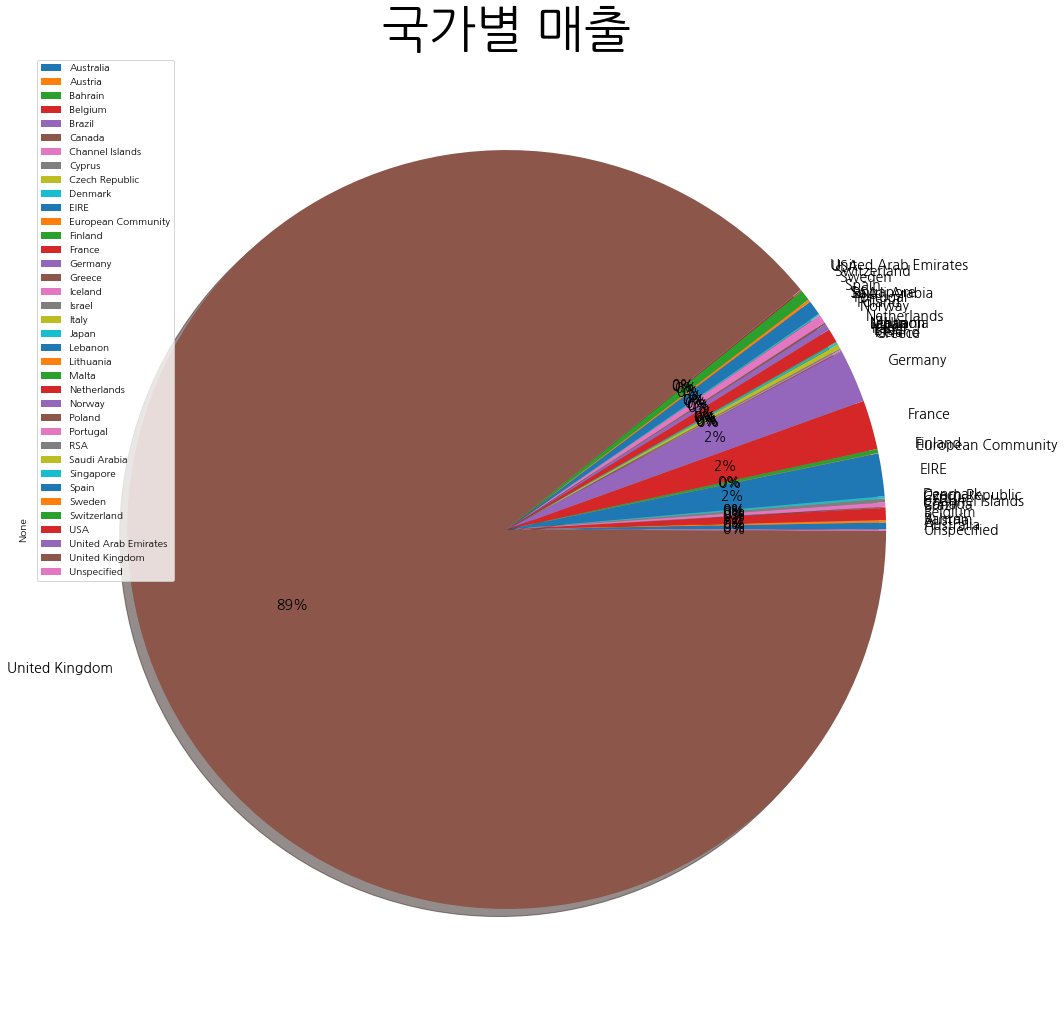

In [17]:
grouped_sr.plot.pie(figsize=(17,25),
                    shadow = True,
                    textprops = {'fontsize' : 14},
                    autopct='%1.0f%%') # 파이 조각의 전체 대비 백분율 

plt.title('국가별 매출', size=50)

plt.legend(grouped_sr.index, loc='best')
plt.show()

#### 월별 매출

In [18]:
retail['주문 시각'].sort_values(ascending=False)

397883   2011-12-09 12:50:00
397876   2011-12-09 12:50:00
397870   2011-12-09 12:50:00
397871   2011-12-09 12:50:00
397872   2011-12-09 12:50:00
                 ...        
3        2010-12-01 08:26:00
1        2010-12-01 08:26:00
5        2010-12-01 08:26:00
6        2010-12-01 08:26:00
0        2010-12-01 08:26:00
Name: 주문 시각, Length: 397884, dtype: datetime64[ns]

In [19]:
def extract_month(date):
    month = str(date.month)
    if date.month < 10:
        month = '0' + month
    return str(date.year) + month 

In [20]:
rev_by_month = retail.set_index('주문 시각').groupby(extract_month).sum()['총 주문 가격']
rev_by_month


201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: 총 주문 가격, dtype: float64

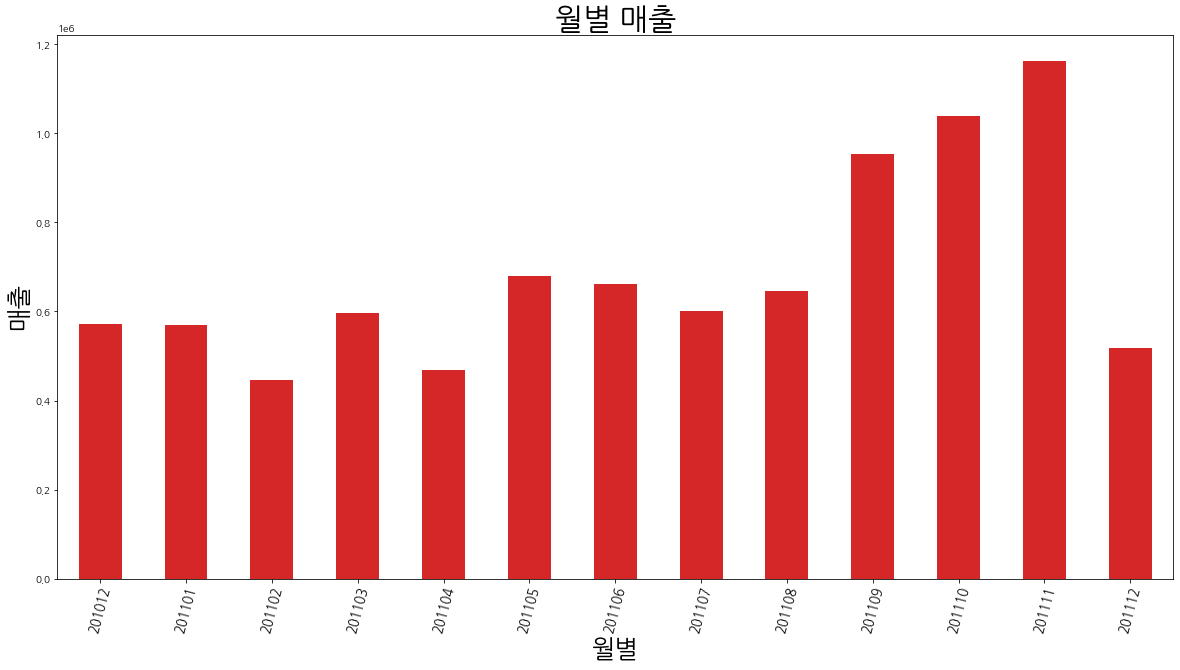

In [21]:
plot_bar(rev_by_month, '월별', '매출', '월별 매출')

#### 요일별 매출

In [22]:
rev_by_dow = retail.set_index('주문 시각').groupby(lambda date:date.dayofweek).sum()['총 주문 가격']
rev_by_dow  ## dayofweek - [Monday 0 ~ Sunday 6]

0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: 총 주문 가격, dtype: float64

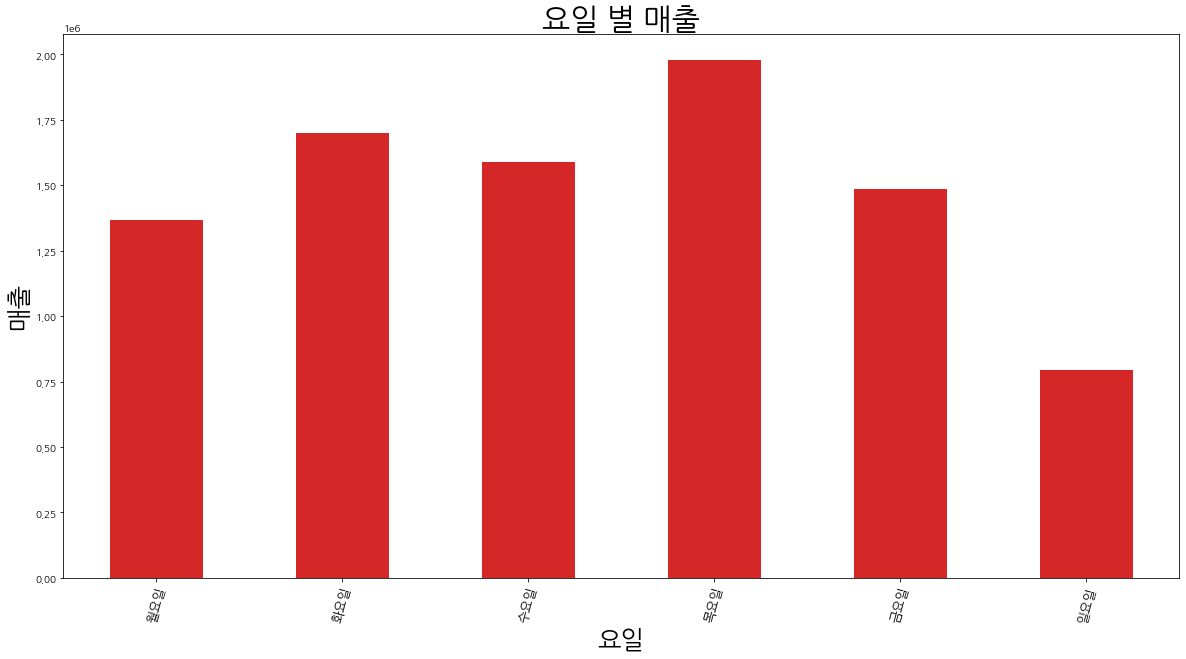

In [23]:
DAY_OF_WEEK = np.array(['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'])
rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]
plot_bar(rev_by_dow, '요일', '매출', '요일 별 매출')

#### 시간별 매출

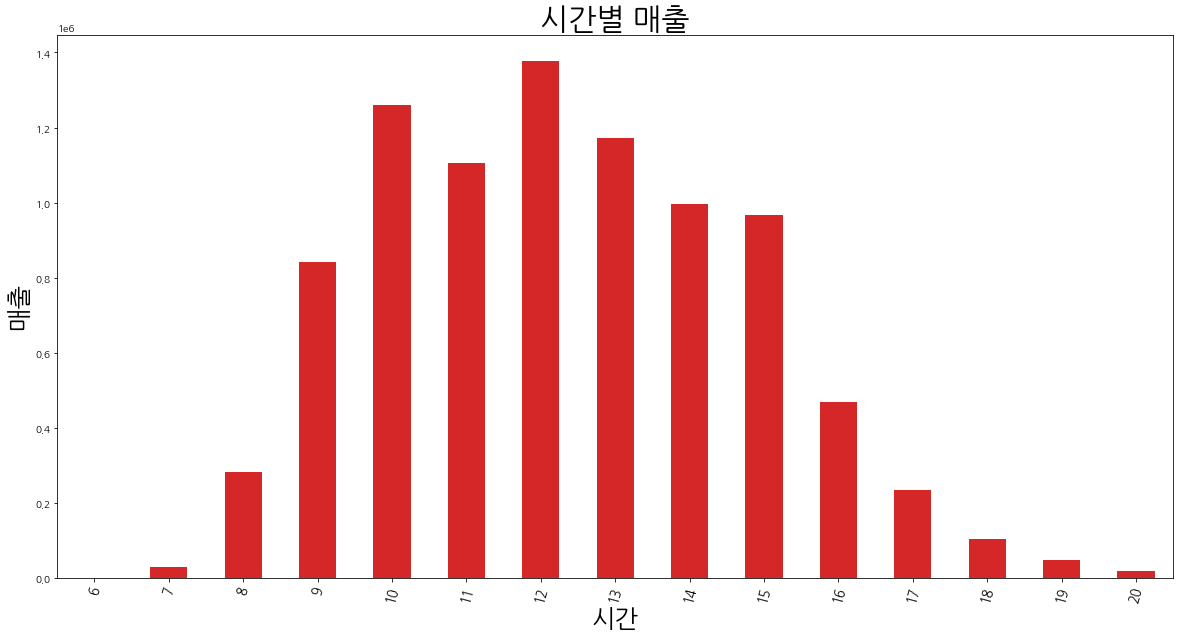

In [26]:
rev_by_hour = retail.set_index('주문 시각').groupby(lambda date:date.hour).sum()['총 주문 가격']
plot_bar(rev_by_hour, '시간', '매출', '시간별 매출')

#### 매출 데이터로부터 insight 
 - 전체 매출의 82%가 UK에서 발생
 - 11년도의 가장 많은 주문이 발생한 달 11월(12월의 전체 데이터가 반영이 되진 않았음)
  - 11, 12월의 판매량이 압도(블랙프라이데이, 사이버먼데이, 크리스마스 휴일)
 - 일주일중 목요일까지는 성장세를 보이다가, 이후로 하락(토요일에는 주문X)
 - 7시를 시작으로 주문이 시작되어 12시까지 증가세, 15시까지 하락을, 15시 이후 부터 급락)

#### 제품별 metrics
 - Top 10 판매 제품
 - Top 10 매출 제품

In [28]:
top_selling = retail.groupby('아이템 아이디').sum()['주문 수량'].sort_values(ascending=False)[:3]
top_selling

아이템 아이디
23843    80995
23166    77916
84077    54415
Name: 주문 수량, dtype: int32

In [29]:
top_revenue = retail.groupby('아이템 아이디').sum()['총 주문 가격'].sort_values(ascending=False)[:10]
top_revenue

아이템 아이디
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: 총 주문 가격, dtype: float64

#### top 3 아이템의 월별 판매량 추이

In [30]:
retail.set_index('주문 시각').groupby(['아이템 아이디', extract_month]).sum()[['주문 수량', '총 주문 가격']].loc[top_selling.index]

주문 수량    총 주문 가격
아이템 아이디                         
23843   201112  80995  168469.60
23166   201101  74215   77183.60
        201105    792     869.04
        201106    391     458.51
        201107    718     826.94
        201108    405     486.09
        201109    342     397.26
        201110    235     283.67
        201111    631     708.11
        201112    187     203.51
84077   201012   5139    1150.47
        201101   1488     385.44
        201102   3457     795.17
        201103   3888     943.20
        201104  10224    2281.44
        201105   4944    1249.44
        201106   1920     533.76
        201107   3600     982.56
        201108   2256     654.24
        201109   3462     985.70
        201110   8174    1953.98
        201111   4500    1294.20
        201112   1363     376.65

In [31]:
monthly_top3 = retail.set_index('주문 시각').groupby(['아이템 아이디', extract_month]).sum()[['주문 수량', '총 주문 가격']].loc[top_selling.index]

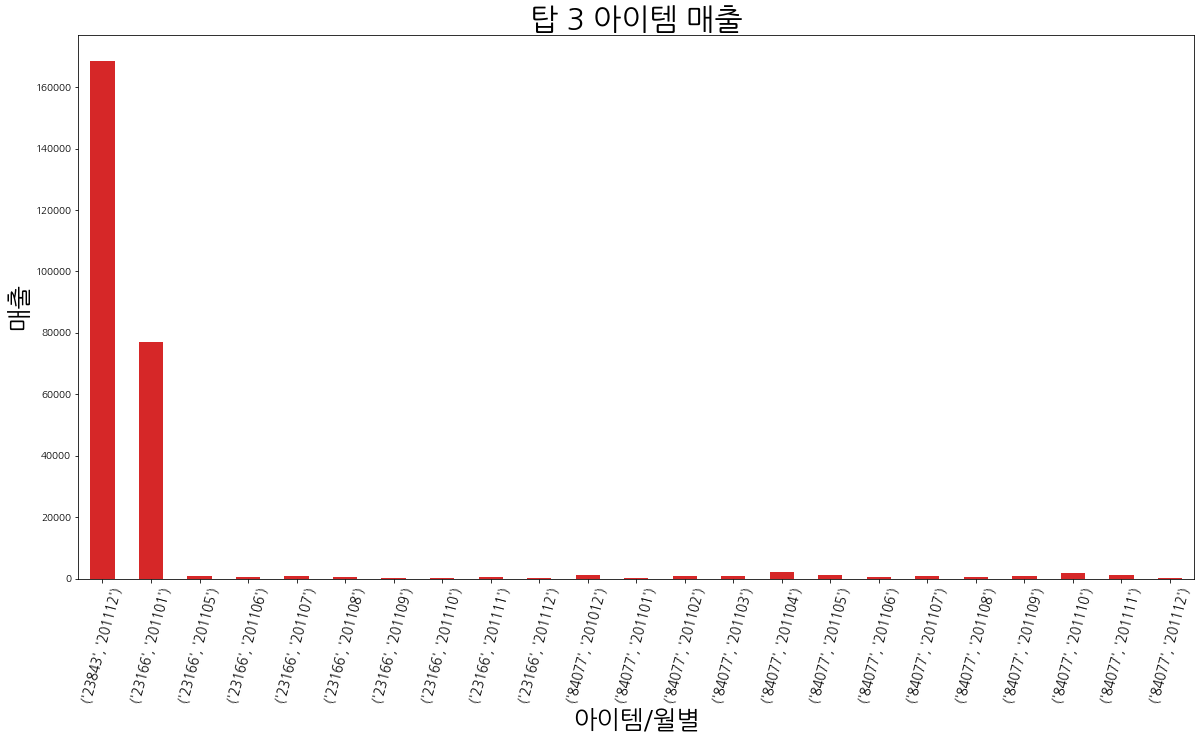

In [34]:
plot_bar(monthly_top3['총 주문 가격'], '아이템/월별', '매출', '탑 3 아이템 매출')